In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Define VGG16 model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16_base.trainable = False
model_vgg16 = models.Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Train VGG16
history_vgg16 = model_vgg16.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 756s 804ms/step - accuracy: 0.6708 - loss: 0.9766 - val_accuracy: 0.9448 - val_loss: 0.1704
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 802s 804ms/step - accuracy: 0.9168 - loss: 0.2705 - val_accuracy: 0.9578 - val_loss: 0.1309
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 787s 839ms/step - accuracy: 0.9336 - loss: 0.2147 - val_accuracy: 0.9635 - val_loss: 0.1074
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 766s 801ms/step - accuracy: 0.9430 - loss: 0.1860 - val_accuracy: 0.9663 - val_loss: 0.1064
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 745s 794ms/step - accuracy: 0.9479 - loss: 0.1732 - val_accuracy: 0.9670 - val_loss: 0.1016
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 735s 783ms/step - accuracy: 0.9503 - loss: 0.1631 - val_accuracy: 0.9669 - val_loss: 0.1011
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 792s 837ms/step - accuracy: 0.9535 - loss: 0.1592 - val_accuracy: 0.9643 - val_loss: 0.1115
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 760s 791ms/step - accuracy: 0.9527 -

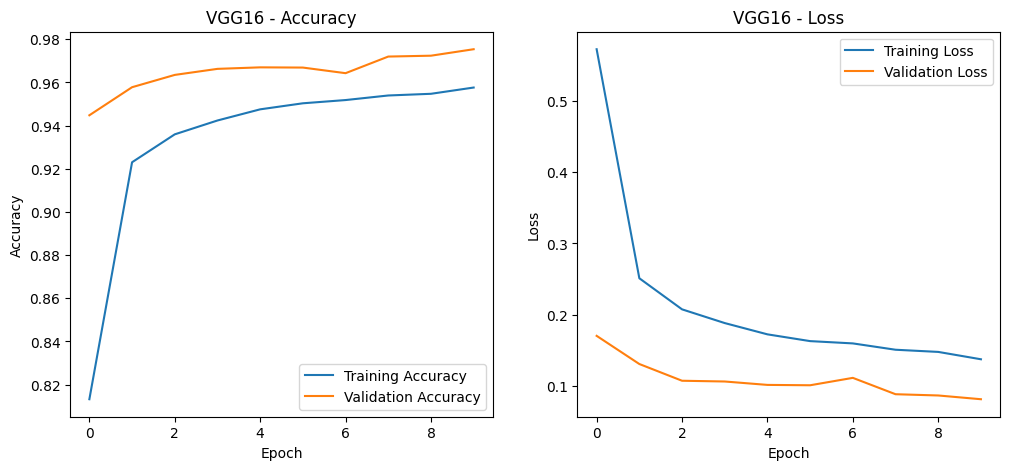

In [6]:
# Plot accuracy and loss
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history_vgg16, "VGG16")

In [8]:
# Evaluate on test data
test_loss, test_accuracy = model_vgg16.evaluate(x_test, y_test)
print(f"VGG16 Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 111s 355ms/step - accuracy: 0.9720 - loss: 0.0919
VGG16 Test Accuracy: 97.54%


313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 357ms/step
Classification Report for VGG16:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.94      0.96       892
           6       0.99      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000



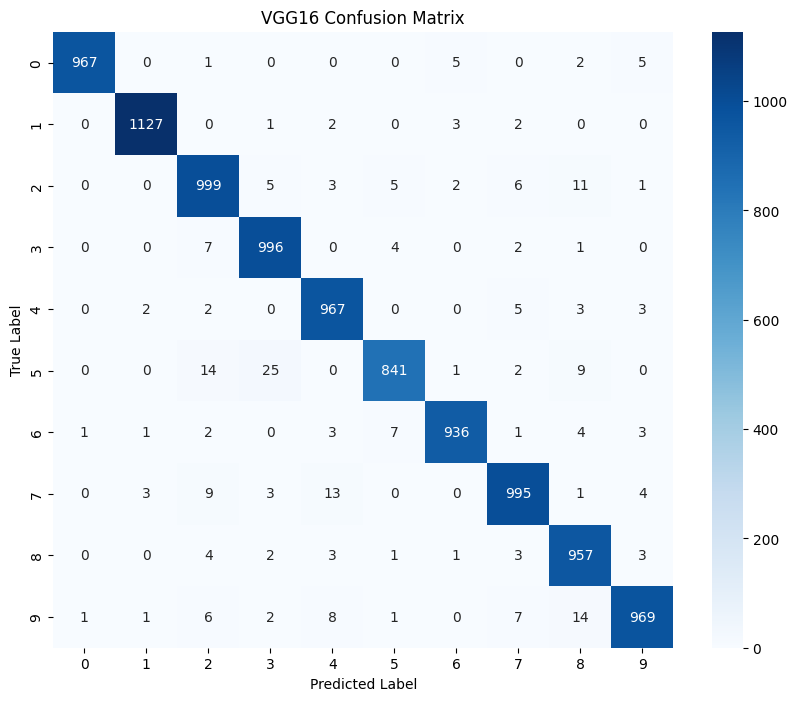

In [10]:
# Predictions and classification report
y_pred_vgg16 = model_vgg16.predict(x_test)
y_pred_classes = np.argmax(y_pred_vgg16, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report for VGG16:")
print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("VGG16 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

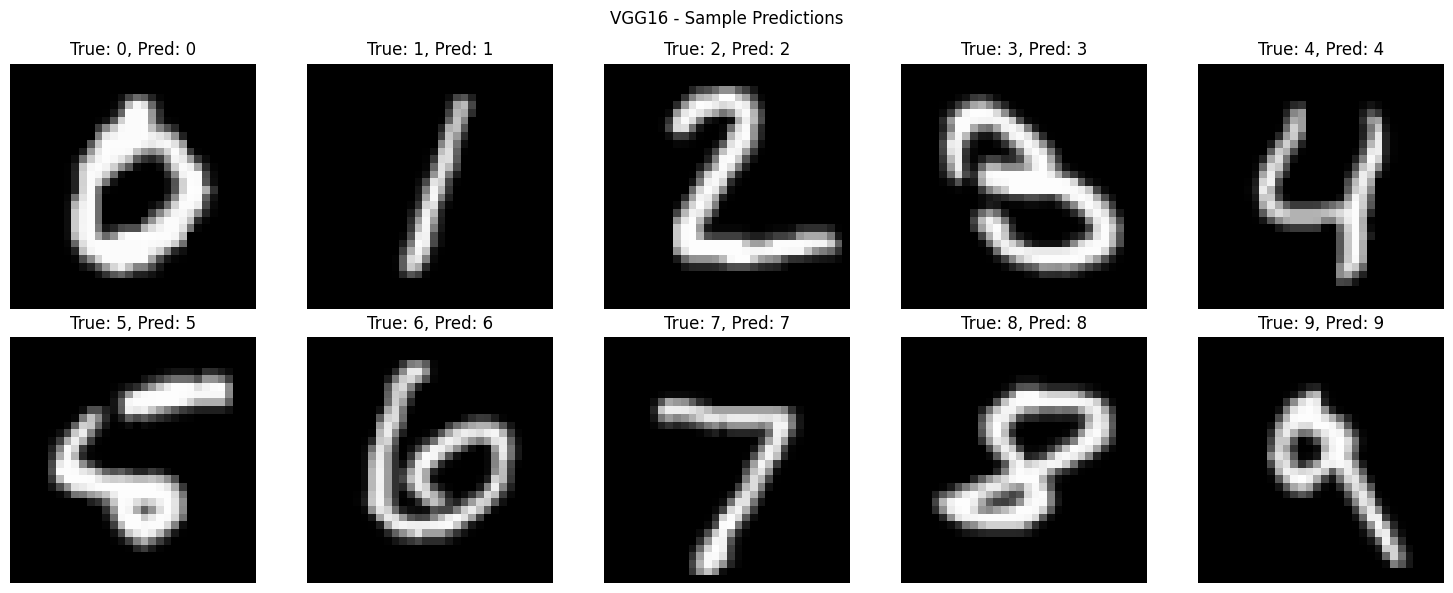

In [11]:
# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('VGG16 - Sample Predictions')
for i, ax in enumerate(axes.flat):
    idx = np.where(y_true == i)[0][0]
    ax.imshow(x_test[idx], cmap='gray')
    ax.set_title(f"True: {i}, Pred: {y_pred_classes[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [1]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_classes, digits=4))

NameError: name 'model' is not defined